# L'objectif de ce travail est de déterminer le prix de vente d'un appartement, dans la ville de Tehran (Iran), à l'aide d'un algorithme de Machine Learning, qui s'appliquera sur un dataset récupéré depuis l'adresse suivante: 
https://archive.ics.uci.edu/ml/datasets/Residential+Building+Data+Set 

# Ce dataset (jeu de données) contient les caractéristiques des ensembles immobiliers déjà construits dans Tehran, notamment le coût de construction, le prix de vente, quelques indicateurs économiques de base tel l'indice des prix à la consommation ainsi que des variables propres au projet.

# Vous trouverez le détail des différentes variables utilisées dans le fichier README.

In [48]:
# Importation des premiers packages nécessaires

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Chargement du jeu de données, au format xlsx, dans un dataframe nommé df:

df = pd.read_excel('Residential-Building-Data-Set.xlsx', header = None)

In [3]:
# Dimensions de notre dataframe:

df.shape

(374, 109)

In [4]:
# Changement de quelques paramètres afin d'afficher toutes les colonnes, au nombre de 109:

pd.set_option('display.max_columns', 109)

In [5]:
# Aperçu des 5 premières lignes de notre dataframe:

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108
0,PROJECT DATES (PERSIAN CALENDAR),NaN,NaN,NaN,PROJECT PHYSICAL AND FINANCIAL VARIABLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUTPUTS,NaN
1,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
2,81,1,85,1,1,3150,920,598.5,190,1010.84,16,1200,6713,56.2,61.52,6.11,320957,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628133,4986,55.5,60.78,3.94,297210,3663.5,61.5,179.63,9342.45,15,757.8,861.8,1755,8018,65,60.53,3538.71,31940.2,610503,6788,54.2,59.4,5.41,280452,3755.8,58.1,119.75,6228.3,15,795,818.5,1755,8001,63.69,58.55,3347.72,21293.5,589390,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.8,606524,7196,51.3,56.13,5.97,249111,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
3,84,1,89,4,1,7600,1140,3040,400,963.81,23,2900,3152,106,103.03,3.15,685698,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113,45966,1.189e+06,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.64,2.76,602225,3819,97.2,104.4,8792.15,15,1298.8,1389.6,8699.73,8735,98.12,98.45,13596.4,22983,973524,3157,92.8,96.49,3.05,552124,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954629,3678,86.2,83.21,3.25,526596,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
4,78,1,81,4,1,4800,840,480,100,689.84,15,630,1627,41,41.25,1.74,160402,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524765,1580,40.3,40.84,1.15,150267,1149.5,34.1,214.35,4866.83,15,573.727,680.29,1755,6714,43.4,36.45,1535.16,29299.5,466212,2628,39.3,40.21,1.52,143738,1284.5,33.5,142.9,3244.55,15,554.082,663.97,1755,5827,41.79,34.76,1527.55,19533,409678,2374,38,39.43,0.92,134548,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170


In [6]:
# Suppression de la première ligne de notre dataframe (index = 0):

df.drop(df.index[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108
1,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
2,81,1,85,1,1,3150,920,598.5,190,1010.84,16,1200,6713,56.2,61.52,6.11,320957,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628133,4986,55.5,60.78,3.94,297210,3663.5,61.5,179.63,9342.45,15,757.8,861.8,1755,8018,65,60.53,3538.71,31940.2,610503,6788,54.2,59.4,5.41,280452,3755.8,58.1,119.75,6228.3,15,795,818.5,1755,8001,63.69,58.55,3347.72,21293.5,589390,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.8,606524,7196,51.3,56.13,5.97,249111,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
3,84,1,89,4,1,7600,1140,3040,400,963.81,23,2900,3152,106,103.03,3.15,685698,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113,45966,1.189e+06,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.64,2.76,602225,3819,97.2,104.4,8792.15,15,1298.8,1389.6,8699.73,8735,98.12,98.45,13596.4,22983,973524,3157,92.8,96.49,3.05,552124,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954629,3678,86.2,83.21,3.25,526596,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
4,78,1,81,4,1,4800,840,480,100,689.84,15,630,1627,41,41.25,1.74,160402,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524765,1580,40.3,40.84,1.15,150267,1149.5,34.1,214.35,4866.83,15,573.727,680.29,1755,6714,43.4,36.45,1535.16,29299.5,466212,2628,39.3,40.21,1.52,143738,1284.5,33.5,142.9,3244.55,15,554.082,663.97,1755,5827,41.79,34.76,1527.55,19533,409678,2374,38,39.43,0.92,134548,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170
5,72,2,73,2,1,685,202,13.7,20,459.54,4,140,2580.93,12.1,10.03,1.24,38193.6,287.2,13.6,17.03,154.4,12,183.6,211.1,1612.95,1649,11.62,10.06,392.96,8435.75,141543,2952,11.6,8.5,1.99,35859.4,322.5,12.67,56.6,610.4,12,165.1,208.6,1504.36,1582,10.86,9.79,435.1,32776,129102,2649,11.4,6.97,2.25,32793.7,388.9,11.73,42.45,457.8,12,167.9,209.6,1450.47,1507,10.17,9.35,508.64,24582,123618,2312,10.6,5.44,2.58,30012.5,345.3,10.79,28.3,305.2,12,180.372,158.45,1439,1450,9.91,8.85,590.64,16388,121857,1381,10,3.91,3,27231.2,316.5,9.85,14.15,152.6,12,197.68,152.25,1442.31,1456,9.73,8.34,686.16,8194,122032,165,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,83,4,86,1,20,1350,350,108,80,251.37,9,830,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.

In [7]:
# Récupération de la liste des noms de la première colonne:

names = list(df.iloc[1])

In [8]:
print(names)

['START YEAR', 'START QUARTER', 'COMPLETION YEAR', 'COMPLETION QUARTER', 'V-1', 'V-2', 'V-3', 'V-4', 'V-5', 'V-6', 'V-7', 'V-8', 'V-11', 'V-12', 'V-13', 'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21', 'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-11', 'V-12', 'V-13', 'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21', 'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-11', 'V-12', 'V-13', 'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21', 'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-11', 'V-12', 'V-13', 'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21', 'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-11', 'V-12', 'V-13', 'V-14', 'V-15', 'V-16', 'V-17', 'V-18', 'V-19', 'V-20', 'V-21', 'V-22', 'V-23', 'V-24', 'V-25', 'V-26', 'V-27', 'V-28', 'V-29', 'V-9', 'V-10']


In [9]:
# Mise de la liste "names" comme nouvelle appélation des colonnes:

df.set_axis(names, axis = 'columns', inplace = True)

In [10]:
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
0,PROJECT DATES (PERSIAN CALENDAR),NaN,NaN,NaN,PROJECT PHYSICAL AND FINANCIAL VARIABLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ECONOMIC VARIABLES AND INDICES IN TIME LAG 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OUTPUTS,NaN
1,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
2,81,1,85,1,1,3150,920,598.5,190,1010.84,16,1200,6713,56.2,61.52,6.11,320957,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628133,4986,55.5,60.78,3.94,297210,3663.5,61.5,179.63,9342.45,15,757.8,861.8,1755,8018,65,60.53,3538.71,31940.2,610503,6788,54.2,59.4,5.41,280452,3755.8,58.1,119.75,6228.3,15,795,818.5,1755,8001,63.69,58.55,3347.72,21293.5,589390,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.8,606524,7196,51.3,56.13,5.97,249111,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
3,84,1,89,4,1,7600,1140,3040,400,963.81,23,2900,3152,106,103.03,3.15,685698,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113,45966,1.189e+06,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.64,2.76,602225,3819,97.2,104.4,8792.15,15,1298.8,1389.6,8699.73,8735,98.12,98.45,13596.4,22983,973524,3157,92.8,96.49,3.05,552124,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954629,3678,86.2,83.21,3.25,526596,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
4,78,1,81,4,1,4800,840,480,100,689.84,15,630,1627,41,41.25,1.74,160402,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524765,1580,40.3,40.84,1.15,150267,1149.5,34.1,214.35,4866.83,15,573.727,680.29,1755,6714,43.4,36.45,1535.16,29299.5,466212,2628,39.3,40.21,1.52,143738,1284.5,33.5,142.9,3244.55,15,554.082,663.97,1755,5827,41.79,34.76,1527.55,19533,409678,2374,38,39.43,0.92,134548,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170


In [11]:
# Suppression définitive des deux première lignes: 

df.drop(df.index[0:2], inplace = True)

In [12]:
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
2,81,1,85,1,1,3150,920,598.5,190,1010.84,16,1200,6713,56.2,61.52,6.11,320957,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628133,4986,55.5,60.78,3.94,297210,3663.5,61.5,179.63,9342.45,15,757.8,861.8,1755,8018,65,60.53,3538.71,31940.2,610503,6788,54.2,59.4,5.41,280452,3755.8,58.1,119.75,6228.3,15,795,818.5,1755,8001,63.69,58.55,3347.72,21293.5,589390,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.8,606524,7196,51.3,56.13,5.97,249111,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
3,84,1,89,4,1,7600,1140,3040,400,963.81,23,2900,3152,106,103.03,3.15,685698,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113,45966,1.189e+06,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.64,2.76,602225,3819,97.2,104.4,8792.15,15,1298.8,1389.6,8699.73,8735,98.12,98.45,13596.4,22983,973524,3157,92.8,96.49,3.05,552124,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954629,3678,86.2,83.21,3.25,526596,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
4,78,1,81,4,1,4800,840,480,100,689.84,15,630,1627,41,41.25,1.74,160402,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524765,1580,40.3,40.84,1.15,150267,1149.5,34.1,214.35,4866.83,15,573.727,680.29,1755,6714,43.4,36.45,1535.16,29299.5,466212,2628,39.3,40.21,1.52,143738,1284.5,33.5,142.9,3244.55,15,554.082,663.97,1755,5827,41.79,34.76,1527.55,19533,409678,2374,38,39.43,0.92,134548,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170
5,72,2,73,2,1,685,202,13.7,20,459.54,4,140,2580.93,12.1,10.03,1.24,38193.6,287.2,13.6,17.03,154.4,12,183.6,211.1,1612.95,1649,11.62,10.06,392.96,8435.75,141543,2952,11.6,8.5,1.99,35859.4,322.5,12.67,56.6,610.4,12,165.1,208.6,1504.36,1582,10.86,9.79,435.1,32776,129102,2649,11.4,6.97,2.25,32793.7,388.9,11.73,42.45,457.8,12,167.9,209.6,1450.47,1507,10.17,9.35,508.64,24582,123618,2312,10.6,5.44,2.58,30012.5,345.3,10.79,28.3,305.2,12,180.372,158.45,1439,1450,9.91,8.85,590.64,16388,121857,1381,10,3.91,3,27231.2,316.5,9.85,14.15,152.6,12,197.68,152.25,1442.31,1456,9.73,8.34,686.16,8194,122032,165,30
6,87,1,90,2,1,3000,800,1230,410,631.91,13,5000,6790,203.8,162.84,6.46,1640293,10855.3,229.3,393.3,69444.8,11,2738.8,3148,9248.4,9380,158.63,169.5,10082,49572,2318397,6370,190.3,154.36,5.33,1.52317e+06,12930,210.7,294.98,52083.6,11,2595.2,3000,9329.64,9396,148.76,159,9700,37179,1.90898e+06,5909,177.6,147.44,6.88,1.45118e+06,8146.1,188.9,196.65,34722.4,11,2284.4,2627.5,9297.06,9347,140.9,146.2,10149,24786,1.68185e+06,7045,160,141.34,4.72,1.34107e+06,8245,173.8,98.33,17361.2,11,2451.2,2526.4,9254.28,9306,136.56,138.8,9291,12393,1.73294e+06,5606,149.1,134.8,4.09,1.2842e+06,6622.5,147.6,432.4,73143.5,14,2220.6,2244.1,9231.76,9286,136.6,140.2,9821,48260,1.73497e+06,5500,700


# Nous commençons à avoir un dataframe qui prend forme pour la future analyse, à l'aide d'un algorithme de Machine Learning que nous allons déterminer plus tard. 

In [13]:
df.shape

(372, 109)

In [14]:
# Quelques statistiques de base:

df.describe()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,V-7,V-8,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-11,V-12,V-13,V-14,V-15,V-16,V-17,V-18,V-19,V-20,V-21,V-22,V-23,V-24,V-25,V-26,V-27,V-28,V-29,V-9,V-10
count,372,372,372,372,372,372.0,372.0,372.0,372,372.00,372,372,372.0,372.0,372.00,372.00,372.0,372.0,372.0,372.0,372.0,372,372.0,372.0,372.0,372.0,372.00,372.0,372.0,372.0,372.0,372.0,372.0,372.00,372.00,372.0,372.0,372.0,372.00,372.0,372,372.0,372.0,372.0,372.0,372.00,372.0,372.0,372.0,372.0,372.0,372.0,372.00,372.00,372.0,372.0,372.0,372.00,372.0,372,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.00,372.00,372.0,372.0,372.0,372.00,372.0,372,372.0,372.0,372.0,372.0,372.00,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.00,372.0,372.0,372.0,372.0,372.0,372,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372.0,372,372
unique,17,4,18,4,20,216.0,105.0,337.0,50,314.00,16,121,66.0,67.0,67.00,65.00,67.0,67.0,67.0,67.0,67.0,4,67.0,66.0,37.0,67.0,67.00,67.0,67.0,67.0,67.0,66.0,67.0,67.00,65.00,67.0,67.0,67.0,67.00,67.0,4,67.0,66.0,37.0,67.0,67.00,67.0,67.0,67.0,67.0,66.0,67.0,67.00,65.00,67.0,67.0,67.0,67.00,67.0,4,67.0,66.0,37.0,67.0,67.0,67.0,67.0,67.0,67.0,66.0,67.0,67.00,65.00,67.0,67.0,67.0,67.00,67.0,4,67.0,66.0,37.0,67.0,67.00,67.0,67.0,67.0,67.0,66.0,67.0,67.0,66.00,67.0,67.0,67.0,67.0,67.0,4,67.0,66.0,37.0,67.0,67.0,67.0,67.0,67.0,67.0,117,62
top,86,1,88,4,20,1540.0,250.0,163.8,100,499.25,6,1200,6713.0,203.8,162.84,3.25,1640293.0,10855.3,229.3,393.3,69444.8,15,2738.8,3148.0,1755.0,9380.0,158.63,169.5,10082.0,49572.0,2318397.0,6370.0,190.3,154.36,5.33,1523166.6,12930.0,210.7,294.98,52083.6,15,2595.2,3000.0,1755.0,9396.0,148.76,159.0,9700.0,37179.0,1908975.7,5909.0,177.6,147.44,6.88,1451175.9,8146.1,188.9,196.65,34722.4,15,2284.4,2627.5,1755.0,9347.0,140.9,146.2,10149.0,24786.0,1681849.3,7045.0,160.0,141.34,4.72,1341072.8,8245.0,173.8,98.33,17361.2,15,2451.2,2526.4,1755.0,9306.0,136.56,138.8,9291.0,12393.0,1732937.5,5606.0,149.1,134.8,3.25,1284199.4,6622.5,147.6,432.4,73143.5,15,2220.6,815.5,1755.0,9286.0,136.6,140.2,9821.0,48260.0,1734973.5,1100,110
freq,41,129,48,106,33,6.0,19.0,3.0,23,4.00,111,16,19.0,19.0,19.00,20.00,19.0,19.0,19.0,19.0,19.0,240,19.0,19.0,120.0,19.0,19.00,19.0,19.0,19.0,19.0,19.0,19.0,19.00,19.00,19.0,19.0,19.0,19.00,19.0,245,19.0,19.0,127.0,19.0,19.00,19.0,19.0,19.0,19.0,19.0,19.0,19.00,19.00,19.0,19.0,19.0,19.00,19.0,254,19.0,19.0,129.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.00,19.00,19.0,19.0,19.0,19.00,19.0,259,19.0,19.0,125.0,19.0,19.00,19.0,19.0,19.0,19.0,19.0,19.0,19.0,25.00,19.0,19.0,19.0,19.0,19.0,260,19.0,19.0,128.0,19.0,19.0,19.0,19.0,19.0,19.0,16,18


In [15]:
# Détermination des valeurs nulles: 

sum(df.isnull().sum())

0

# Il n'y a aucune valeur nulle, ce qui nous permet de mener une analyse à l'aide un algorithme de ML. 
# Une présence de valeurs nulles (NaN) nous aurait obligés à les supprimer, car les résultats du ML auraient été faussés.

# Pour une meilleure copréhension des variables, changeons leurs noms: 

In [16]:
new_col_names = ['START YEAR',
 'START QUARTER',
 'COMPLETION YEAR',
 'COMPLETION QUARTER',
 'Project_locality',
 'Floor_area',
 'Lot_area',
 'TPECC_PBP',
 'PECC_PBP',
 'EPECC_PBP_SBY',
 'Construction_duration',
 'Unit_price_BP_m²',
 'Number_of_bulding_permits',
 'BSI_SBY',
 'WPI_BM_SBY',
 'TFA_BM',
 'Cumulative_liquidity',
 'PSI',
 'LPI_SBY',
 'NLE_by_banks',
 'ALE_by_banks',
 'Interest_rate',
 'ACC_PS_TC',
 'ACC_PS_BC',
 'Exchange_rate_dollar',
 'Non_official_exchange_rate',
 'CPI',
 'CPI_water_housing_fuel',
 'Stock_market_index',
 'Tehran_population',
 'Gold_price_per_ounce',
 'Number_of_bulding_permits_1',
 'BSI_SBY_1',
 'WPI_BM_SBY_1',
 'TFA_BM_1',
 'Cumulative_liquidity_1',
 'PSI_1',
 'LPI_SBY_1',
 'NLE_by_banks_1',
 'ALE_by_banks_1',
 'Interest_rate_1',
 'ACC_PS_TC_1',
 'ACC_PS_BC_1',
 'Exchange_rate_dollar_1',
 'Non_official_exchange_rate_1',
 'CPI_1',
 'CPI_water_housing_fuel_1',
 'Stock_market_index_1',
 'Tehran_population_1',
 'Gold_price_per_ounce_1',
 'Number_of_bulding_permits_2',
 'BSI_SBY_2',
 'WPI_BM_SBY_2',
 'TFA_BM_2',
 'Cumulative_liquidity_2',
 'PSI_2',
 'LPI_SBY_2',
 'NLE_by_banks_2',
 'ALE_by_banks_2',
 'Interest_rate_2',
 'ACC_PS_TC_2',
 'ACC_PS_BC_2',
 'Exchange_rate_dollar_2',
 'Non_official_exchange_rate_2',
 'CPI_2',
 'CPI_water_housing_fuel_2',
 'Stock_market_index_2',
 'Tehran_population_2',
 'Gold_price_per_ounce_2',
 'Number_of_bulding_permits_3',
 'BSI_SBY_3',
 'WPI_BM_SBY_3',
 'TFA_BM_3',
 'Cumulative_liquidity_3',
 'PSI_3',
 'LPI_SBY_3',
 'NLE_by_banks_3',
 'ALE_by_banks_3',
 'Interest_rate_3',
 'ACC_PS_TC_3',
 'ACC_PS_BC_3',
 'Exchange_rate_dollar_3',
 'Non_official_exchange_rate_3',
 'CPI_3',
 'CPI_water_housing_fuel_3',
 'Stock_market_index_3',
 'Tehran_population_3',
 'Gold_price_per_ounce_3',
 'Number_of_bulding_permits_4',
 'BSI_SBY_4',
 'WPI_BM_SBY_4',
 'TFA_BM_4',
 'Cumulative_liquidity_4',
 'PSI_4',
 'LPI_SBY_4',
 'NLE_by_banks_4',
 'ALE_by_banks_4',
 'Interest_rate_4',
 'ACC_PS_TC_4',
 'ACC_PS_BC_4',
 'Exchange_rate_dollar_4',
 'Non_official_exchange_rate_4',
 'CPI_4',
 'CPI_water_housing_fuel_4',
 'Stock_market_index_4',
 'Tehran_population_4',
 'Gold_price_per_ounce_4',
 'Actual_sales_price_(output)',
 'Actual_construction_costs_(output)']

In [17]:
# Application des nouveaux noms de variables à notre dataframe: 

df.set_axis(new_col_names, axis = 'columns', inplace = True)

In [18]:
df.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,Project_locality,Floor_area,Lot_area,TPECC_PBP,PECC_PBP,EPECC_PBP_SBY,Construction_duration,Unit_price_BP_m²,Number_of_bulding_permits,BSI_SBY,WPI_BM_SBY,TFA_BM,Cumulative_liquidity,PSI,LPI_SBY,NLE_by_banks,ALE_by_banks,Interest_rate,ACC_PS_TC,ACC_PS_BC,Exchange_rate_dollar,Non_official_exchange_rate,CPI,CPI_water_housing_fuel,Stock_market_index,Tehran_population,Gold_price_per_ounce,Number_of_bulding_permits_1,BSI_SBY_1,WPI_BM_SBY_1,TFA_BM_1,Cumulative_liquidity_1,PSI_1,LPI_SBY_1,NLE_by_banks_1,ALE_by_banks_1,Interest_rate_1,ACC_PS_TC_1,ACC_PS_BC_1,Exchange_rate_dollar_1,Non_official_exchange_rate_1,CPI_1,CPI_water_housing_fuel_1,Stock_market_index_1,Tehran_population_1,Gold_price_per_ounce_1,Number_of_bulding_permits_2,BSI_SBY_2,WPI_BM_SBY_2,TFA_BM_2,Cumulative_liquidity_2,PSI_2,LPI_SBY_2,NLE_by_banks_2,ALE_by_banks_2,Interest_rate_2,ACC_PS_TC_2,ACC_PS_BC_2,Exchange_rate_dollar_2,Non_official_exchange_rate_2,CPI_2,CPI_water_housing_fuel_2,Stock_market_index_2,Tehran_population_2,Gold_price_per_ounce_2,Number_of_bulding_permits_3,BSI_SBY_3,WPI_BM_SBY_3,TFA_BM_3,Cumulative_liquidity_3,PSI_3,LPI_SBY_3,NLE_by_banks_3,ALE_by_banks_3,Interest_rate_3,ACC_PS_TC_3,ACC_PS_BC_3,Exchange_rate_dollar_3,Non_official_exchange_rate_3,CPI_3,CPI_water_housing_fuel_3,Stock_market_index_3,Tehran_population_3,Gold_price_per_ounce_3,Number_of_bulding_permits_4,BSI_SBY_4,WPI_BM_SBY_4,TFA_BM_4,Cumulative_liquidity_4,PSI_4,LPI_SBY_4,NLE_by_banks_4,ALE_by_banks_4,Interest_rate_4,ACC_PS_TC_4,ACC_PS_BC_4,Exchange_rate_dollar_4,Non_official_exchange_rate_4,CPI_4,CPI_water_housing_fuel_4,Stock_market_index_4,Tehran_population_4,Gold_price_per_ounce_4,Actual_sales_price_(output),Actual_construction_costs_(output)
2,81,1,85,1,1,3150,920,598.5,190,1010.84,16,1200,6713,56.2,61.52,6.11,320957,3485.8,64.5,239.5,12456.6,15,797.3,809.8,1755,8003,67.81,63.25,3758.77,42587,628133,4986,55.5,60.78,3.94,297210,3663.5,61.5,179.63,9342.45,15,757.8,861.8,1755,8018,65,60.53,3538.71,31940.2,610503,6788,54.2,59.4,5.41,280452,3755.8,58.1,119.75,6228.3,15,795,818.5,1755,8001,63.69,58.55,3347.72,21293.5,589390,5728,52.4,57.65,5.4,262789,2931.4,54.2,59.88,3114.15,15,746.8,815.5,1755,8013,62.78,56.45,3387.72,10646.8,606524,7196,51.3,56.13,5.97,249111,2562.3,52.8,217,10445.6,15,733.8,815.5,1755,8002,60.74,54.26,2978.26,41407,601988,2200,410
3,84,1,89,4,1,7600,1140,3040,400,963.81,23,2900,3152,106,103.03,3.15,685698,3526.1,105.5,208.8,17584.3,15,1408.4,1473.5,8842.18,8864,105.52,105.32,12113,45966,1.189e+06,2700,103,101.84,2.65,625829,4386.9,100.4,156.6,13188.2,15,1424.1,1584.3,8776.71,8799,101,101.89,13571.8,34474.5,1067772,3561,98.2,98.64,2.76,602225,3819,97.2,104.4,8792.15,15,1298.8,1389.6,8699.73,8735,98.12,98.45,13596.4,22983,973524,3157,92.8,96.49,3.05,552124,3896.7,96.9,52.2,4396.08,15,1294.2,1288,8555.54,8585,95.35,94.34,12063.5,11491.5,954629,3678,86.2,83.21,3.25,526596,2790.6,94.1,334.8,14488.6,15,1143.8,1316.3,8364.78,8393,90.95,89.79,11379.4,44835,929027,5000,1000
4,78,1,81,4,1,4800,840,480,100,689.84,15,630,1627,41,41.25,1.74,160402,1217.5,34.4,285.8,6489.1,15,614,608.2,1755,7773,45.91,38.34,1537.96,39066,524765,1580,40.3,40.84,1.15,150267,1149.5,34.1,214.35,4866.83,15,573.727,680.29,1755,6714,43.4,36.45,1535.16,29299.5,466212,2628,39.3,40.21,1.52,143738,1284.5,33.5,142.9,3244.55,15,554.082,663.97,1755,5827,41.79,34.76,1527.55,19533,409678,2374,38,39.43,0.92,134548,1191.1,33.7,71.45,1622.28,15,574.6,680.5,1755,5565,41.03,33.37,1601.79,9766.5,403875,2693,36.2,37.64,1.55,134312,1529,31.43,175.7,3994.7,15,589.5,765.8,1755,4930,38.7,32.04,1653.06,37933,377829,1200,170
5,72,2,73,2,1,685,202,13.7,20,459.54,4,140,2580.93,12.1,10.03,1.24,38193.6,287.2,13.6,17.03,154.4,12,183.6,211.1,1612.95,1649,11.62,10.06,392.96,8435.75,141543,2952,11.6,8.5,1.99,35859.4,322.5,12.67,56.6,610.4,12,165.1,208.6,1504.36,1582,10.86,9.79,435.1,32776,129102,2649,11.4,6.97,2.25,32793.7,388.9,11.73,42.45,457.8,12,167.9,209.6,1450.47,1507,1

In [19]:
# Maintenant, déterminons le type des variables présentes dans le dataframe:

df.dtypes

START YEAR                            object
START QUARTER                         object
COMPLETION YEAR                       object
COMPLETION QUARTER                    object
Project_locality                      object
                                       ...  
Stock_market_index_4                  object
Tehran_population_4                   object
Gold_price_per_ounce_4                object
Actual_sales_price_(output)           object
Actual_construction_costs_(output)    object
Length: 109, dtype: object

In [20]:
df.dtypes.unique()

array([dtype('O')], dtype=object)

# Nous avons seulement un seul type de variable ('object'). Ce type n'est pas indiqué pour les algorithmes de ML. 
# Il nous faut donc changer et convertir en un type numérique ('int64'):

In [21]:
df = df.astype('int64')

In [22]:
df.dtypes

START YEAR                            int64
START QUARTER                         int64
COMPLETION YEAR                       int64
COMPLETION QUARTER                    int64
Project_locality                      int64
                                      ...  
Stock_market_index_4                  int64
Tehran_population_4                   int64
Gold_price_per_ounce_4                int64
Actual_sales_price_(output)           int64
Actual_construction_costs_(output)    int64
Length: 109, dtype: object

In [23]:
df.dtypes.unique()

array([dtype('int64')], dtype=object)

# Nous avons maintenant un type de variable réglé à int64.

# Avant de passer à l'analyse prédictive, faisons quelques visualisations sur notre dataset afin d'avoir une meilleure compréhension des données à notre disposition:

# Commençons par visualiser la relation entre le prix d'un lot immobilier et sa surface: 

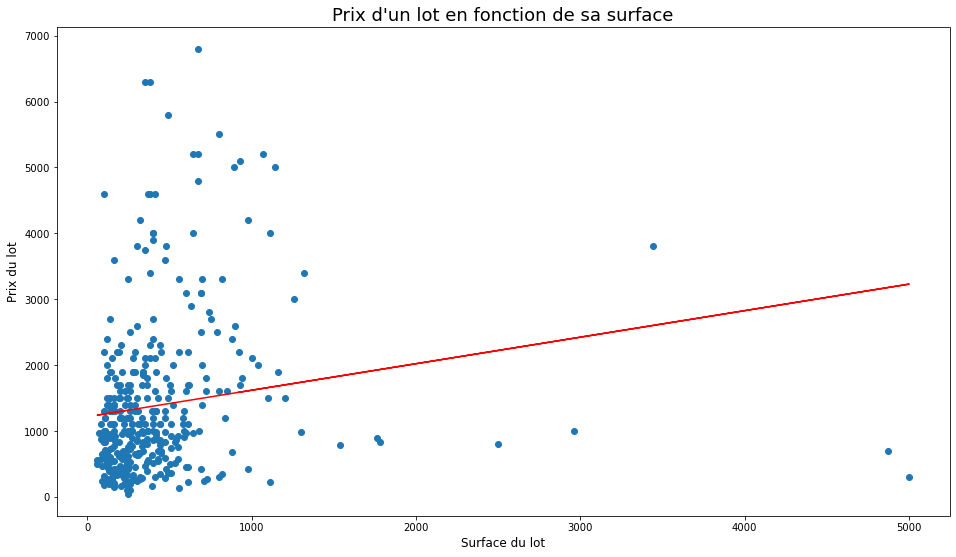

In [39]:
plt.figure(figsize = (16,9))
plt.scatter(df['Lot_area'], df['Actual_sales_price_(output)'])
m, b = np.polyfit(df['Lot_area'], df['Actual_sales_price_(output)'], 1)
plt.plot(df['Lot_area'], m*(df['Lot_area'])+b, color = 'red')
plt.title('Prix d\'un lot en fonction de sa surface', fontsize = 18)
plt.xlabel('Surface du lot', fontsize = 12)
plt.ylabel('Prix du lot', fontsize = 12);

# Nous remarquons que la relation entre la surface et le prix n'est pas forcément linéaire.
# D'ores et déjà, nous pouvons présumer que la surface à elle seule n'explique pas le prix de vente du lot
# Appliquons un rapide test statistique afin de vérifier ou d'infirmer cette hypothèse.

In [41]:
# Appliquons le test de Pearson (vu que nous avons affaire à des variables continues)

In [40]:
from scipy.stats import pearsonr

In [44]:
pd.DataFrame(pearsonr(df['Lot_area'], df['Actual_sales_price_(output)']), index = ['Pearson_coeff', 'P_value'],
            columns = ['Test_result'])

,Test_result
Pearson_coeff,0.163542
P_value,0.001551


# Le test confirme bien une corrélation extrêmement faible (coefficient de pearson à 0.16).

# Enchainons par une visualisation illustrant l'évolution des prix dans le temps:

In [46]:
df['START YEAR'].unique()

array([81, 84, 78, 72, 87, 88, 76, 80, 75, 85, 86, 83, 74, 82, 77, 73, 79],
      dtype=int64)

C:\Users\pedro_000\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


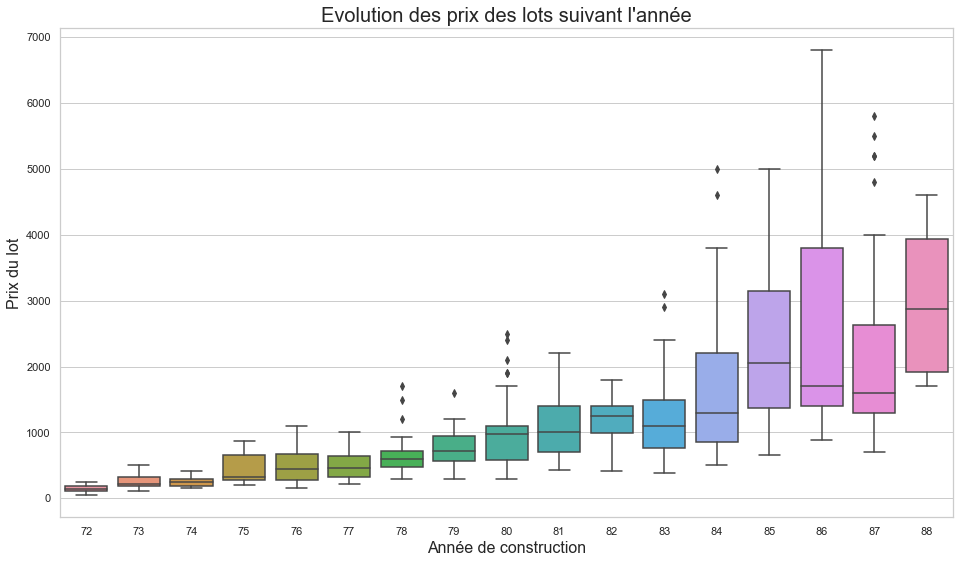

In [75]:
plt.figure(figsize = (16,9))
sns.set_theme(style="whitegrid")
ax = sns.boxplot('START YEAR', 'Actual_sales_price_(output)', data = df)
ax.set_xlabel('Année de construction', fontsize = 16)
ax.set_ylabel('Prix du lot', fontsize = 16)
ax.set_title('Evolution des prix des lots suivant l\'année', fontsize = 20);

# Nous remarquons que les prix des lots augmentent de façon continue entre 1972 et 1988.
# Nous pouvons vérifier cela à l'aide d'un test statistique (Pearson).

In [80]:
pd.DataFrame(pearsonr(df['START YEAR'], df['Actual_sales_price_(output)']), index = ['Pearson_coeff', 'P_value'],
            columns = ['Test_result'])

,Test_result
Pearson_coeff,6.071236e-01
P_value,7.740337e-39


In [81]:
pearsonr(df['START YEAR'], df['Actual_sales_price_(output)'])

(0.6071235812012881, 7.74033663478861e-39)

# Le P de pearson est élevé (0.60), avec une P_value < 0.05, où 0.05 est le risque de 1ère espèce (seuil à 95%).
# La relation entre le prix et l'année est statistiquement significative.

# Avant de passer au ML, faisons d'abord une ACP (Analyse en Composantes Principales), ou PCA en anglais. 
# C'est une méthode d'analyse de données utile afin de déterminer quelles sont les variables les plus influentes dans un jeu de données. Elle consiste à transformer des variables liées entre elles en de nouvelles décorrélées les unes des autres, en les projetant sur un nouveau plan géométrique.

# La variable que l'on veut expliquer ici est "Actual_sales_price_(output)". Commençons par l'isoler, puis la supprimer du nouveau dataframe à utiliser:

In [86]:
price = df['Actual_sales_price_(output)']

In [87]:
df_1 = df.drop('Actual_sales_price_(output)', axis = 1)

# Supprimons aussi la variable "Actual_construction_costs_(output)" qui est une autre variable à expliquer, mais dont nous n'aurons pas besoin pour le moment:

In [90]:
df_1 = df_1.drop('Actual_construction_costs_(output)', axis = 1)

In [91]:
df_1.head()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,Project_locality,Floor_area,Lot_area,TPECC_PBP,PECC_PBP,EPECC_PBP_SBY,Construction_duration,Unit_price_BP_m²,Number_of_bulding_permits,BSI_SBY,WPI_BM_SBY,TFA_BM,Cumulative_liquidity,PSI,LPI_SBY,NLE_by_banks,ALE_by_banks,Interest_rate,ACC_PS_TC,ACC_PS_BC,Exchange_rate_dollar,Non_official_exchange_rate,CPI,CPI_water_housing_fuel,Stock_market_index,Tehran_population,Gold_price_per_ounce,Number_of_bulding_permits_1,BSI_SBY_1,WPI_BM_SBY_1,TFA_BM_1,Cumulative_liquidity_1,PSI_1,LPI_SBY_1,NLE_by_banks_1,ALE_by_banks_1,Interest_rate_1,ACC_PS_TC_1,ACC_PS_BC_1,Exchange_rate_dollar_1,Non_official_exchange_rate_1,CPI_1,CPI_water_housing_fuel_1,Stock_market_index_1,Tehran_population_1,Gold_price_per_ounce_1,Number_of_bulding_permits_2,BSI_SBY_2,WPI_BM_SBY_2,TFA_BM_2,Cumulative_liquidity_2,PSI_2,LPI_SBY_2,NLE_by_banks_2,ALE_by_banks_2,Interest_rate_2,ACC_PS_TC_2,ACC_PS_BC_2,Exchange_rate_dollar_2,Non_official_exchange_rate_2,CPI_2,CPI_water_housing_fuel_2,Stock_market_index_2,Tehran_population_2,Gold_price_per_ounce_2,Number_of_bulding_permits_3,BSI_SBY_3,WPI_BM_SBY_3,TFA_BM_3,Cumulative_liquidity_3,PSI_3,LPI_SBY_3,NLE_by_banks_3,ALE_by_banks_3,Interest_rate_3,ACC_PS_TC_3,ACC_PS_BC_3,Exchange_rate_dollar_3,Non_official_exchange_rate_3,CPI_3,CPI_water_housing_fuel_3,Stock_market_index_3,Tehran_population_3,Gold_price_per_ounce_3,Number_of_bulding_permits_4,BSI_SBY_4,WPI_BM_SBY_4,TFA_BM_4,Cumulative_liquidity_4,PSI_4,LPI_SBY_4,NLE_by_banks_4,ALE_by_banks_4,Interest_rate_4,ACC_PS_TC_4,ACC_PS_BC_4,Exchange_rate_dollar_4,Non_official_exchange_rate_4,CPI_4,CPI_water_housing_fuel_4,Stock_market_index_4,Tehran_population_4,Gold_price_per_ounce_4
2,81,1,85,1,1,3150,920,598,190,1010,16,1200,6713,56,61,6,320957,3485,64,239,12456,15,797,809,1755,8003,67,63,3758,42587,628132,4986,55,60,3,297210,3663,61,179,9342,15,757,861,1755,8018,65,60,3538,31940,610502,6788,54,59,5,280451,3755,58,119,6228,15,795,818,1755,8001,63,58,3347,21293,589389,5728,52,57,5,262789,2931,54,59,3114,15,746,815,1755,8013,62,56,3387,10646,606524,7196,51,56,5,249110,2562,52,217,10445,15,733,815,1755,8002,60,54,2978,41407,601988
3,84,1,89,4,1,7600,1140,3040,400,963,23,2900,3152,106,103,3,685697,3526,105,208,17584,15,1408,1473,8842,8864,105,105,12113,45966,1188995,2700,103,101,2,625829,4386,100,156,13188,15,1424,1584,8776,8799,101,101,13571,34474,1067772,3561,98,98,2,602224,3819,97,104,8792,15,1298,1389,8699,8735,98,98,13596,22983,973523,3157,92,96,3,552124,3896,96,52,4396,15,1294,1288,8555,8585,95,94,12063,11491,954628,3678,86,83,3,526596,2790,94,334,14488,15,1143,1316,8364,8393,90,89,11379,44835,929027
4,78,1,81,4,1,4800,840,480,100,689,15,630,1627,41,41,1,160401,1217,34,285,6489,15,614,608,1755,7773,45,38,1537,39066,524764,1580,40,40,1,150266,1149,34,214,4866,15,573,680,1755,6714,43,36,1535,29299,466212,2628,39,40,1,143737,1284,33,142,3244,15,554,663,1755,5827,41,34,1527,19533,409677,2374,38,39,0,134548,1191,33,71,1622,15,574,680,1755,5565,41,33,1601,9766,403875,2693,36,37,1,134312,1529,31,175,3994,15,589,765,1755,4930,38,32,1653,37933,377828
5,72,2,73,2,1,685,202,13,20,459,4,140,2580,12,10,1,38193,287,13,17,154,12,183,211,1612,1649,11,10,392,8435,141542,2952,11,8,1,35859,322,12,56,610,12,165,208,1504,1582,10,9,435,32776,129102,2649,11,6,2,32793,388,11,42,457,12,167,209,1450,1507,10,9,508,24582,123618,2312,10,5,2,30012,345,10,28,305,12,180,158,1439,1450,9,8,590,16388,121857,1381,10,3,3,27231,316,9,14,152,12,197,152,1442,1456,9,8,686,8194,122031
6,87,1,90,2,1,3000,800,1230,410,631,13,5000,6790,203,162,6,1640293,10855,229,393,69444,11,2738,3148,9248,9380,158,169,10082,49572,2318397,6370,190,154,5,1523166,12930,210,294,52083,11,2595,3000,9329,9396,148,159,9700,37179,1908975,5909,177,147,6,1451175,8146,188,196,34722,11,2284,2627,9297,9347,140,146,10149,24786,1681849,7045,160,141,4,1341072,8245,173,98,17361,11,2451,2526,9254,9306,136,138,9291,12393,1732937,5606,149,134,4,1284199,6622,147,432,73143,14,2220,2244,9231,9286,136,140,9

# Maintenant, il faut normaliser nos données contenues dans df_1: ceci est primordial afin de réduire l'effet d'échelle, du fait de la différence des unités de mesure:

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
scaler = StandardScaler()

In [94]:
N = scaler.fit_transform(df_1)

# Appliquons maintenant l'ACP:

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA()

In [97]:
coord = pca.fit_transform(N)

# Affichons la part de la variance expliquée pour chaque composante de l'ACP:

In [98]:
print('La part de la variance expliquée est:', pca.explained_variance_)

La part de la variance expliquée est: [6.98622385e+01 7.28095829e+00 5.09385608e+00 4.80346193e+00
 3.28955199e+00 3.09911676e+00 2.05404399e+00 1.64598208e+00
 1.54349416e+00 1.15730053e+00 9.86439264e-01 9.48076062e-01
 8.41637601e-01 6.41163694e-01 5.00046661e-01 4.60305300e-01
 3.36745986e-01 3.14185876e-01 2.67625969e-01 2.41999673e-01
 2.06156687e-01 1.96432143e-01 1.80638237e-01 1.64244276e-01
 1.39251746e-01 1.15487255e-01 1.05590153e-01 9.46552578e-02
 8.08888090e-02 6.85286141e-02 5.39089115e-02 5.30081914e-02
 4.56728098e-02 4.12079778e-02 3.96554635e-02 3.41900305e-02
 2.97534638e-02 2.78752225e-02 2.50294392e-02 2.34081658e-02
 2.08896291e-02 1.92231666e-02 1.82538735e-02 1.70116772e-02
 1.57377463e-02 1.34363018e-02 1.20930349e-02 1.07625535e-02
 8.67125646e-03 7.73512614e-03 6.47519291e-03 5.70729833e-03
 5.12492585e-03 4.92741300e-03 4.22926472e-03 3.97772285e-03
 3.61186581e-03 3.05759223e-03 2.44019477e-03 2.04017143e-03
 1.86089773e-03 1.36800345e-03 1.13342768e-03 9

# Traçons une courbe des valeurs ci-haut: 

In [100]:
df_1.shape

(372, 107)

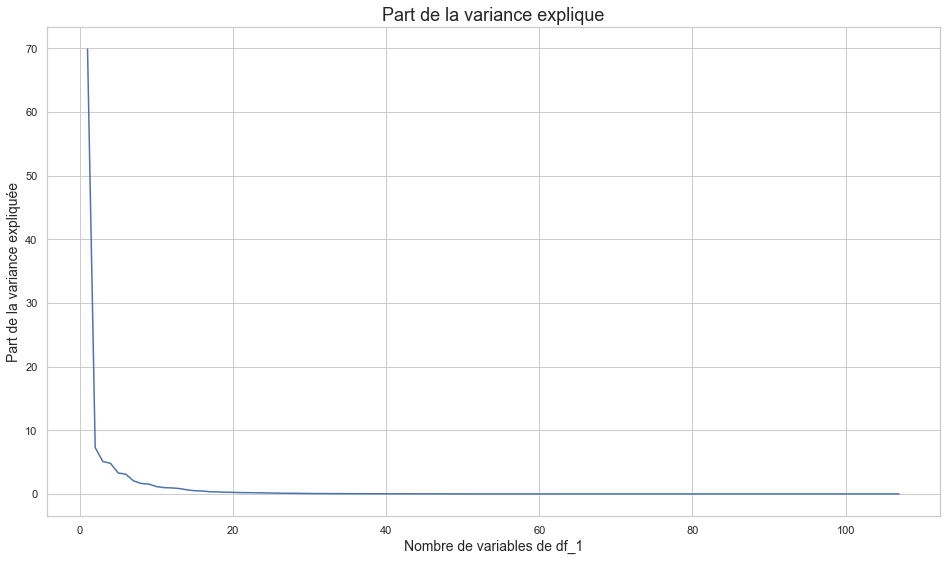

In [105]:
plt.figure(figsize = (16,9))
plt.plot(np.arange(1, 108), pca.explained_variance_)
plt.xlabel('Nombre de variables de df_1', fontsize = 14)
plt.ylabel('Part de la variance expliquée', fontsize = 14)
plt.title('Part de la variance explique', fontsize = 18);

# Maintenant, il nous faut déterminer le nombre de variables explicatives à retenir. Pour ce faire, nous allons appliquer la méthode dite "du coude": il s'agit de déterminer le point d'inflection de la courbe du ratio de la variance expliquée:

In [106]:
print('Le ration de la variance expliquée est de:', pca.explained_variance_ratio_)

Le ration de la variance expliquée est de: [6.51162961e-01 6.78634189e-02 4.74781581e-02 4.47714897e-02
 3.06608328e-02 2.88858486e-02 1.91450689e-02 1.53416579e-02
 1.43864017e-02 1.07868179e-02 9.19427612e-03 8.83670533e-03
 7.84462743e-03 5.97607603e-03 4.66077056e-03 4.29035440e-03
 3.13869864e-03 2.92842327e-03 2.49445368e-03 2.25559941e-03
 1.92151871e-03 1.83087943e-03 1.68366963e-03 1.53086691e-03
 1.29791975e-03 1.07641874e-03 9.84171103e-04 8.82250544e-04
 7.53937999e-04 6.38732686e-04 5.02467243e-04 4.94071928e-04
 4.25701247e-04 3.84086016e-04 3.69615540e-04 3.18674035e-04
 2.77322256e-04 2.59815786e-04 2.33291175e-04 2.18179819e-04
 1.94705367e-04 1.79172817e-04 1.70138354e-04 1.58560251e-04
 1.46686360e-04 1.25235353e-04 1.12715204e-04 1.00314223e-04
 8.08219312e-05 7.20965681e-05 6.03531447e-05 5.31958517e-05
 4.77677492e-05 4.59267969e-05 3.94195863e-05 3.70750472e-05
 3.36650139e-05 2.84988121e-05 2.27442533e-05 1.90157673e-05
 1.73448161e-05 1.27507105e-05 1.05643068e

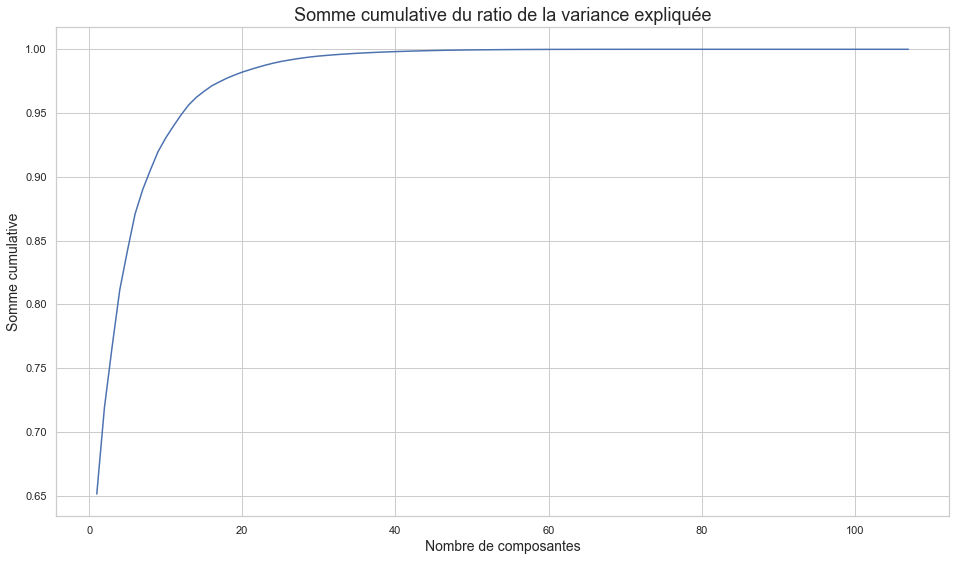

In [111]:
# Courbe de la somme cumulative du ratio de la variance expliquée: 

plt.figure(figsize = (16,9))
plt.plot(np.arange(1,108), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nombre de composantes', fontsize = 14)
plt.ylabel('Somme cumulative', fontsize = 14)
plt.title('Somme cumulative du ratio de la variance expliquée', fontsize = 18);

# Approximativement, 80% de la variance expliquée l'est avec 4 axes. Nous retenons 4 composantes principales.

In [166]:
# Code pour le "cercle des corrélations": cependant, il s'affiche mal du fait du trop grand nombre de variables de df_1.

'''R = np.sqrt(pca.explained_variance_)

corvar = np.zeros((107, 107))
for k in range(107):
    corvar[:, k] = pca.components_[:, k] * R[k]
    

fig, axes = plt.subplots(figsize=(10, 10))
axes.set_xlim(-10, 10)
axes.set_ylim(-10, 10)

for j in range(107):
    plt.annotate(df_1.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')
    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6,
        alpha=0.5, head_width=0.03, color='b')

plt.plot([-10, 10], [0, 0], color='silver', linestyle='-', linewidth=1)
plt.plot([0, 0], [-10, 10], color='silver', linestyle='-', linewidth=1)

cercle = plt.Circle((0, 0), 10, color='#16E4CA', fill=False)
axes.add_artist(cercle)
plt.xlabel('AXE 1')
plt.ylabel('AXE 2')
plt.show()'''

"R = np.sqrt(pca.explained_variance_)\n\ncorvar = np.zeros((107, 107))\nfor k in range(107):\n    corvar[:, k] = pca.components_[:, k] * R[k]\n    \n\nfig, axes = plt.subplots(figsize=(10, 10))\naxes.set_xlim(-10, 10)\naxes.set_ylim(-10, 10)\n\nfor j in range(107):\n    plt.annotate(df_1.columns[j], (corvar[j, 0], corvar[j, 1]), color='#091158')\n    plt.arrow(0, 0, corvar[j, 0]*0.6, corvar[j, 1]*0.6,\n        alpha=0.5, head_width=0.03, color='b')\n\nplt.plot([-10, 10], [0, 0], color='silver', linestyle='-', linewidth=1)\nplt.plot([0, 0], [-10, 10], color='silver', linestyle='-', linewidth=1)\n\ncercle = plt.Circle((0, 0), 10, color='#16E4CA', fill=False)\naxes.add_artist(cercle)\nplt.xlabel('AXE 1')\nplt.ylabel('AXE 2')\nplt.show()"